In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In der folgenden Analyse werden statistische Verfahren auf die Daten des Fußballtransfermarktes angewandt. Hieraus sollte Rückschlüsse gezogen werden können, welchen Einfluss verschiedene Spielerdaten auf den Marktwert eines Spielers haben. Hierzu wurden die Daten der Website Transfermarkt.de mithilfe eines Crawelrs gespeichert. Abgerufen wurden die Daten am 20.06.2020 weshalb die Aktualität abweichen kann.


Der Marktwert eines Spielers ist zu vergleichen mit dem Marktwert eines Unternehmen. Bestimmt wird der Marktwert aus verschiedenen Analysen- , Studien- und Kennzahlen, die Experten hervorheben. So ist es z. B. von Bedeutung, ob ein Spieler viele Tore schießt, welche Titel dieser in seiner Karriere gewonnen hat und auch das Alter des Spielers. Nach dem Marktwert und dem dann noch bestehenden Vertrag, den ein Spieler besitzt, wird bei einem „Kauf“ eines Spielers so auch die Ablösesumme bestimmt, wenn diese nicht vorher vertraglich festgehalten wurde.



In [27]:
df = pd.read_excel ('./transfermarkt_clean.xlsx')
df.head(10)

,Unnamed: 0,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,0,Ederson,56000000,31,1993-08-17,Manchester City,Torwart,188.0,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,1,Claudio Bravo,1200000,1,1983-04-13,Manchester City,Torwart,184.0,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,2,John Stones,36000000,5,1994-05-28,Manchester City,Innenverteidiger,188.0,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom
3,3,Eric García,6300000,50,2001-01-09,Manchester City,Innenverteidiger,183.0,Barcelona,Premier League,20,2.177432,41.382894,España
4,4,Joel Latibeaudiere,100000,-,2000-01-06,Man City U23,Innenverteidiger,180.0,Doncaster,Premier League,21,-1.133531,53.522768,United Kingdom
5,5,Oleksandr Zinchenko,24000000,11,1996-12-15,Manchester City,Linker Verteidiger,175.0,"Radomyshl, Zhytomyr ...",Premier League,24,29.228959,50.496181,Україна
6,6,João Cancelo,36000000,27,1994-05-27,Manchester City,Rechter Verteidiger,182.0,Barreiro,Premier League,26,-9.047857,38.634066,Portugal
7,7,Fernandinho,8000000,25,1985-05-04,Manchester City,Defensives Mittelfeld,179.0,Londrina,Premier League,35,-51.159502,-23.311288,Brasil
8,8,Phil Foden,27000000,47,2000-05-28,Manchester City,Zentrales Mittelfeld,171.0,Stockport,Premier League,20,-2.160243,53.407901,United Kingdom
9,9,David Silva,12000000,21,1986-01-08,Manchester City,Offensives Mittelfeld,170.0,Arguineguín,Premier League,35,-15.681350,27.759075,España


Zunächst wird die Excel Datei, welche von dem Crawler erstellt wurde und von bereinigt wurde, in ein Dataframe geladen.

In [28]:
del df['Unnamed: 0']
df.head(3)

,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,Ederson,56000000,31,1993-08-17,Manchester City,Torwart,188.0,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,Claudio Bravo,1200000,1,1983-04-13,Manchester City,Torwart,184.0,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,John Stones,36000000,5,1994-05-28,Manchester City,Innenverteidiger,188.0,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom


Als nächstes muss wieder die Zeile "Unnamed" gelöscht werden, da diese durch ein Excel export / import automatisch erstellt wird.

In [29]:
df["Values"] = df.apply(lambda row: row["Values"] / 1000000, axis=1)
df.head(3)

,Players,Values,Number,BDay,Club,Position,Size,Birth Place,Leauge,Age,Lon,Lat,country
0,Ederson,56.0,31,1993-08-17,Manchester City,Torwart,188.0,Osasco (SP),Premier League,27,-46.791680,-23.532486,Brasil
1,Claudio Bravo,1.2,1,1983-04-13,Manchester City,Torwart,184.0,Viluco,Premier League,37,-71.159347,-34.896282,Chile
2,John Stones,36.0,5,1994-05-28,Manchester City,Innenverteidiger,188.0,Barnsley,Premier League,26,-1.482776,53.552772,United Kingdom


Nun werden die Values aus optischen Gründen in Millionnen angegeben. Dafür wird jeder Marktwert geteilt.

In [30]:
df.describe()

,Values,Size,Age,Lon,Lat
count,20914.000000,17816.000000,20914.000000,20914.000000,20914.000000
mean,3.064455,182.398181,25.978866,12.200817,41.717974
std,9.359818,6.677803,4.721866,28.632888,18.934170
min,0.025000,158.000000,16.000000,-123.113953,-41.500083
25%,0.150000,178.000000,22.000000,4.269680,40.792949
50%,0.325000,183.000000,26.000000,14.248783,46.314395
75%,1.200000,187.000000,29.000000,23.728305,51.507322
max,180.000000,204.000000,45.000000,176.167505,70.049628


Anhand dieser Tabelle kann man bereits erste statistische Werte ablesen. So zeigte diese zum einen mit dem Wert 20914 bei count an wie viele Spielerdaten mithilfe des Crawlers erfasst wurden. Die Differenz der count Kennzahl zwischen Values und Size kommt dadurch zustande, dass nicht alle Größen der Spieler bekannt sind und somit eine Differenz von 3098 entsteht. Die Lon und Lat brauchen hierbei nicht beachtet werden, da diese ausschließlich zur Standort Bestimmung eines jeden Spielers dient. Der Mittelwert der Daten lässt sich in der mean Spalte ablesen. So liegt die Durchschnittsgröße der Spieler bei ca. 182,40, das Durchschnittsalter bei 25,98 Jahren und die Durchschnittliche Marktwert bei 3,064 Mio €. Zusätzlich kann man bereits die obere und untere Grenzen der Daten ablesen. So ist der kleinste Spieler 158,00 cm groß und der größte 204,00 cm. Bei den Marktwerten liegt die untere Grenze bei 0,025 Mio € und der höchste Marktwert liegt bei 180 Mio. €.

Text(0.5, 1.0, 'Marktwert im Verhältnis zum Alter der Spieler')

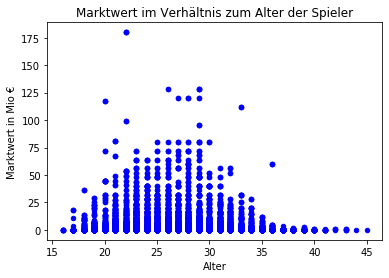

In [31]:
df.plot.scatter(x='Age',y='Values',c='Blue')
plt.ylabel("Marktwert in Mio €")
plt.xlabel("Alter")
plt.title("Marktwert im Verhältnis zum Alter der Spieler")

Das Punktediagramm zeigt nochmals die Verteilung der Jahre in der Fußballbranche sowie die Marktwerthöhen. Man kann hier auch bereits erste Erkenntnisse daraus ziehen, dass die höchsten Marktwerte der Spieler im Alter von 22 bis 30 erzielt werden. Des weiteren kann man sehen, dass der Spieler mit 175 Mio. € Marktwert einen großen Abstand zu den darunter liegenden hat.

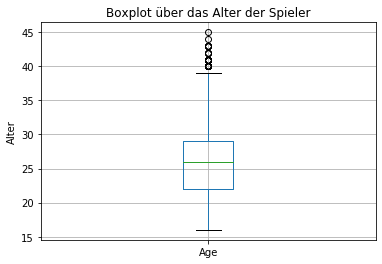

In [32]:
df.boxplot(column="Age")
plt.ylabel("Alter")
plt.title("Boxplot über das Alter der Spieler")
plt.show()

Der Boxplot symbolisiert nochmals die Werte, welche das df.describe bereits berechnet hat in grafischer Form, so sieht man das Alter der Fußballspieler auf einem Blick. So kann man anhand des Boxplots erkennen, 
dass das Durchschnittsalter der Fußballspieler bei 26 liegt. Der jüngste Fußballspieler ist 16 und der älteste 39. Ebenfalls lässt sich das obere und untere Quartil ablesen.

Die Quartile weißen dabei folgende Eigenschaften aus:
•	Unteres Quartil: Es sind maximal ein Viertel aller Werte unterhalb dieses Quartils und maximal drei Viertel über diesem Wert. In der Grafik oberhalb ist dies die untere Waagerechte Linie des Rechtecks.
•	Obers Quartil: Hier sind maximal drei Viertel aller Werte unterhalb dieses Wertes sowie maximal ein Viertel über ihn. In der Grafik oberhalb ist dies die obere Waagerechte Linie des Rechtecks.

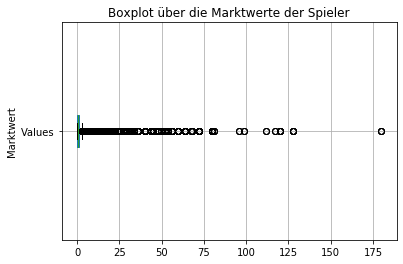

In [33]:
df.boxplot(column="Values", vert=False,)
plt.ylabel("Marktwert")
plt.title("Boxplot über die Marktwerte der Spieler")
plt.show()

Das Gleiche wird hier dann nochmal für den Marktwert der Spieler gemacht. 
Hier ist dies allerdings nicht sehr aussagekräftig, da die Werte sehr groß sind und stark streuen.

Text(0.5, 1.0, 'Die Top 10 Spieler Sortiert nach Marktwert')

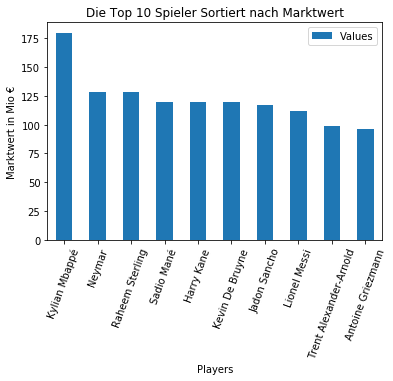

In [34]:
unique_players = df[['Players','Values']].drop_duplicates(subset="Players", keep="first")
first_ten_player = unique_players[['Players','Values']].sort_values(by=['Values'], ascending=False)[:10]
first_ten_player.plot(x='Players',y='Values' ,kind="bar", rot=70)
plt.ylabel("Marktwert in Mio €")
plt.title("Die Top 10 Spieler Sortiert nach Marktwert")

Die folgenden Balkendiagramme (Bar Graph) sollen die Top 10 an Klubs sowie Spieler von „analyse_transfermarkt.ipynb“ visualisieren. Das Balkendiagramm eignet sich gut, um die hier bestehenden Differenzen der einzelnen Elemente anzeigen zu lassen.
Man sieht hier bereits den großen Abstand, welcher Platz 1 und 2 trennt. Hier ist eine Differenz von knapp 50 Mio. € zuerkennen. Im Gegensatz dazu ist die Differenz zwischen den nachfolgenden Plätzen relativ gering. Was die Besonderheit des Spielers „Kylian Mbappe“ andeutet.

                   Values
Club                     
Paris SG         3386.800
Real Madrid      2665.500
FC Liverpool     2573.100
FC Barcelona     2530.950
Bayern München   2251.125
...                   ...
Orenburg II         0.025
Charleroi Res.      0.025
Olimp. Sarajevo     0.025
Mikkelin            0.025
 FC Boca Gib        0.025

[1080 rows x 1 columns]


Text(0.5, 1.0, 'Die Top 10 Clubs Sortiert nach Marktwert')

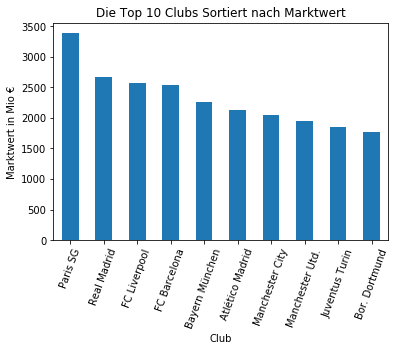

In [35]:
group_club = df[['Values','Club']]
group_club = group_club.groupby(['Club']).sum()
print(group_club.sort_values(by=['Values'], ascending=False))
first_ten_group_club = group_club.sort_values(by=['Values'], ascending=False)[:10]
first_ten_group_club['Values'].plot(kind="bar", rot=70)
plt.ylabel("Marktwert in Mio €")
plt.title("Die Top 10 Clubs Sortiert nach Marktwert")

Hier wird die Liste nach dem jeweiligen Verein gruppiert und sortiert. Dabei werden die Marktwerte zusammensummiert, um so eine Gesamtsumme der Marktwerte für den jeweiligen Klub zu erhalten. Nun wurde ein Balkendiagramm aus den ersten 10 Klubs gemacht. 
Auch die Sortierung nach Klubs gibt es ein Team, was hervorsticht, dies ist hier Paris SG. Eine weitere Auffälligkeit fällt auf, wenn man sich das Herkunftsland der Teams anguckt.

| Frankreich | Spanien         | England           | Deutschland    | Italien        |
|------------|-----------------|-------------------|----------------|----------------|
| Paris SG   | Real Madrid     | FC Liverpool      | Bayern München | Juventus Turin |
|            | FC Barcelona.   | Manchester City   | Bor. Dortmund  |                |
|            | Atletico Madrid | Manchester United |                |                |

Paris ist auf Platz 1. Der Marktwerte jedoch auch der einzige Vertreter der französischen Liga (Lique 1). Die Spanische, Englische und auch die Deutsche Liga haben mindestens 2 Vertreter in den Top 10. 
Zeigen tut dies, das in diesen Ligen mehrere Top Klubs vorhanden sind und somit ein größerer Konkurrenzkamp im Bezug zur Meisterschaft besteht.


          Values       Age      Size
Values  1.000000  0.013908 -0.024825
Age     0.013908  1.000000  0.071756
Size   -0.024825  0.071756  1.000000


Text(0.5, 1, 'Korrelation zwischen Alter, Marktwert Age')

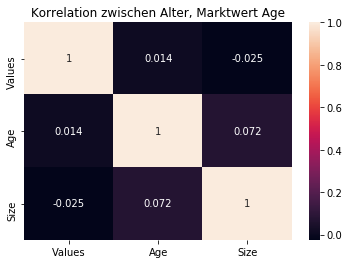

In [36]:
import seaborn as sn # Wird genutzt um folgende Heatmap zu erstellen.
dfcorr = df[['Values', 'Age' ,'Size']]
corrMatrix = dfcorr.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.title("Korrelation zwischen Alter, Marktwert Age")

Eine Korrelation hilft dabei, Beziehungen zwischen gewissen Merkmalen zu analysieren. Dabei wird ein Korrelationskoeffizient berechnet, welcher einen Wert zwischen -1 und +1 annehmen kann und dabei eine Aussage über die Beziehung der Merkmale gibt. Die obere Matrix visualisiert das Ergebnis der Korrelation nochmals mit Farbe. Hierdurch lässt sich die Ausprägung der Beziehungen übersichtlich darstellen. Je heller ein Quadrat in der Matrix ist, desto stärker ist die Beziehung zwischen den Merkmalen.

Anhand der obigen Grafik lässt sich erkennen, dass die Beziehungen zwischen den Merkmalen nicht sehr stark ist und somit kein direkter Zusammenhang zwischen den Marktwert und dem Alter oder der Größe eines Fußballspielers besteht.

In [37]:
country_value = df[['country', 'Values']]
group_country = df[['country', 'Values']].groupby("country")
sum_group_country = group_country.sum().rename(columns={'Values':'Sum'})
country_value = country_value.merge(sum_group_country, left_on='country', right_index=True)
#country_value['Sum'] = group_country.transform('sum')
country_value = country_value.drop_duplicates(subset="country", keep="first")
country_value

,country,Values,Sum
0,Brasil,56.000,5799.15
1,Chile,1.200,96.60
2,United Kingdom,36.000,5789.95
3,España,6.300,5651.10
5,Україна,24.000,518.45
...,...,...,...
10871,Eritrea,0.050,0.20
10906,Montserrat,0.050,0.05
14936,San Marino,0.025,1.30
15679,Bahamas,0.100,0.10


Marktwert Summe für jedes Land bilden und diese dann als z in der Map definieren.

In [38]:
import chart_studio.plotly as py # Dient zur Dartstellung der untengezeigten Karte.
import plotly.graph_objs as go # Dient zur Dartstellung der untengezeigten Karte.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Dient zur Dartstellung der untengezeigten offline Karte.
init_notebook_mode(connected=True)


data = dict(type = 'choropleth', 
           locations = country_value['country'],
           locationmode = 'country names',
           z = country_value['Values'],
           text = country_value['country'],
           colorbar = {'title':'Marktwert'})
layout = dict(title = 'Heatmap Marktwerte je Nationalität', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Auf der darüber liegenden Karte sieht man die Gesamtsumme der Marktwerte pro Land. Hieraus lässt sich erkennen, aus welchen Staaten die Fußballer mit den höchsten Marktwerte stammen.

Mithilfe der Marktwert Karte soll eine Übersicht darüber gegeben werden, in welchem Verhältnis der Marktwert mit dem Herkunftsland der Spieler steht. So kann man anhand der Färbung des jeweiligen Landes erkennen, wie hoch die Summe der Marktwerte ist, aus die ein Spieler stammt. Die Karte deckt dabei alle 195 Staaten der Erde ab und ist dabei interaktiv steuerbar. So kann man sich innerhalb der Karte bewegen.

In [39]:
from sklearn.cluster import KMeans
df_kmean = df[['Values', 'Age']]
km = KMeans(n_clusters=10)
km.fit(df_kmean)
y_km = km.predict(df_kmean)

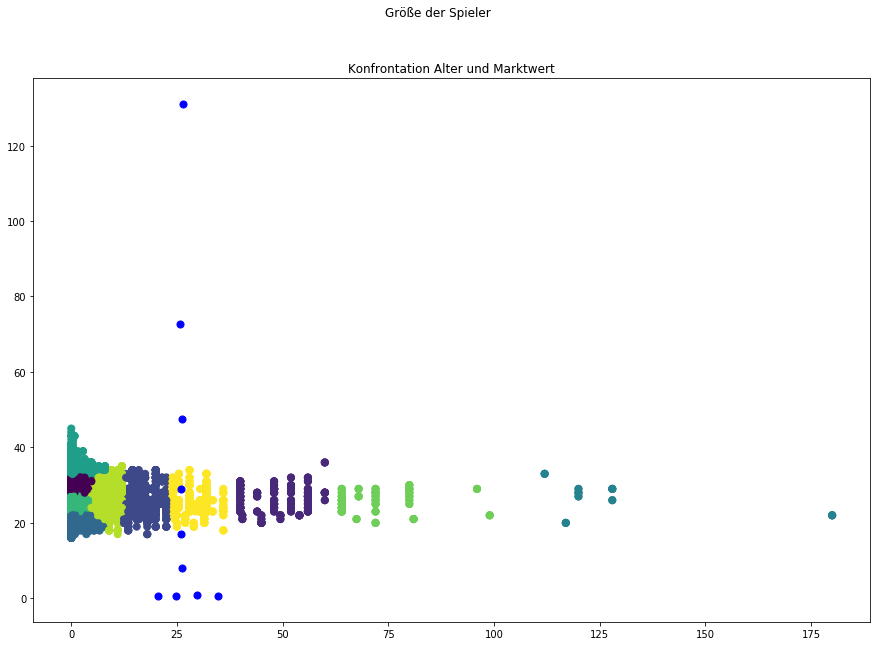

In [40]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(df_kmean["Values"], df_kmean['Age'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='blue', marker='.',s=200, alpha=1)
plt.title("Konfrontation Alter und Marktwert")
plt.suptitle("Größe der Spieler")
_=plt.xlabel('')

Der KMeans Algorithmus ist eine Clusteranalyse, mit der sich Gruppierungen bilden lassen.

Durch den KMean Algorithmus lassen sich Gruppierungen aus Datensätze bilden. Dabei ist der KMean Algorithmus dafür gemacht, großer Datenmenge sehr effizient zu bearbeiten und somit Perfekt für die hier angewandten Daten geeignet.
Ziel einer Clusteranalyse ist es, Gruppen aus den Datensätzen zu bilden und so ähnliche Werte zusammenzufassen. Die Reihenfolge, wie der KMean Algorithmus erfolgt, ist dabei immer gleich und erfolgt in 4 Schritten:

1.	Zunächst werden die sogenannten K-Punkte gewählt diese dienen als Anfangszentren der Berechnung
2.	Im 2 Schritt. Werden die Datenpunkte dann den verschiedenen Clustern zugeordnet. Dies erfolgt dabei auf den Abstand zu den verschiedenen Zentren.
3.	Nun folgt eine Neu Berechnung der Clusterzentren, um diese noch genauer zuzuordnen.
4.	Nun werden die Schritte ab Schritt 2 solange wiederholt, bis keine Änderung der Zentren mehr erfolgt.

In der obigen Abbildung wurde der KMean auf den Datensatz angewandt und in einem Diagramm dargestellt. Auf der y-Achse befindet sich hierbei das Alter und auf der x-Achse der Marktwert der Spieler.


In [41]:
group_value = df[['Position', 'Values']]
group_position = df[['Position', 'Values']].groupby("Position")
sum_group_position = group_position.agg(['sum', 'count', 'mean']).rename(columns={'Values':'Sum'})
group_value = group_value.merge(sum_group_position, left_on='Position', right_index=True)
group_value = group_value.drop_duplicates(subset="Position", keep="first")
del group_value['Values']
group_value.columns = ['Position', 'Sum_Value' , 'Count', 'Mean']
group_value.head(5)

/Users/justinmester/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,Position,Sum_Value,Count,Mean
0,Torwart,3940.100,2142,1.839449
2,Innenverteidiger,10497.250,3325,3.157068
5,Linker Verteidiger,3851.125,1425,2.702544
6,Rechter Verteidiger,4040.225,1549,2.608280
7,Defensives Mittelfeld,4480.790,1586,2.825214


In [42]:
mittelfeld_value = group_value[group_value['Position'].str.contains('Mittelfeld')]
mittelfeld_value

,Position,Sum_Value,Count,Mean
7,Defensives Mittelfeld,4480.790,1586,2.825214
8,Zentrales Mittelfeld,9702.550,2286,4.244335
9,Offensives Mittelfeld,4388.175,1337,3.282105
37,Linkes Mittelfeld,721.025,318,2.267374
365,Rechtes Mittelfeld,629.550,319,1.973511
3924,Mittelfeld,1.050,9,0.116667


Text(0.5, 1.0, 'Kreisdiagramm zur Häufigkeit der verschiedenen Mittelfeld Rollen')

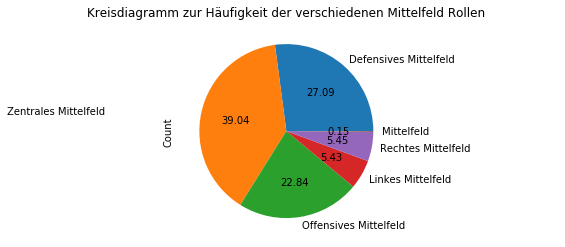

In [43]:
mittelfeld_value['Count'].plot(kind='pie', labels=mittelfeld_value.Position, fontsize=10,autopct='%.2f')
plt.title("Kreisdiagramm zur Häufigkeit der verschiedenen Mittelfeld Rollen")

Da im Fußball die Position der Spieler sehr unterschiedlich sind und oftmals auch unterschiedlich bewertet werden, wurde hier zunächst ein Kreisdiagramm erstellt, um alle Positionen, welche im Mittelfeld existieren, anzuzeigen und diese gleichzeitig mit der dazugehörigen Häufigkeit visualisierbar zu machen. 
Anhand des Kreisdiagramms kann man erkennen, dass das Zentralemittelfeld mit 39 % die meist gespielte Position
im Mittelfeld ist.

In [44]:
number_agg = df[['Number', 'Values']]
group_number = df[['Number', 'Values']].groupby("Number")
count_group_number = group_number.agg(['sum', 'count', 'mean']).rename(columns={'Values':'Sum'})
number_agg = number_agg.merge(count_group_number, left_on='Number', right_index=True)
number_agg.columns = ['Number','Values', 'Sum_Value' , 'Count' , 'Mean']
number_agg = number_agg.drop_duplicates(subset="Number", keep="first")
number_agg

/Users/justinmester/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



,Number,Values,Sum_Value,Count,Mean
0,31,56.00,730.050,269,2.713941
1,1,1.20,1948.000,649,3.001541
2,5,36.00,2751.750,667,4.125562
3,50,6.30,48.600,39,1.246154
4,-,0.10,405.770,921,0.440575
...,...,...,...,...,...
2150,75,0.35,3.450,12,0.287500
2239,82,0.30,12.025,24,0.501042
3264,61,0.05,81.100,17,4.770588
5669,58,0.45,1.250,11,0.113636


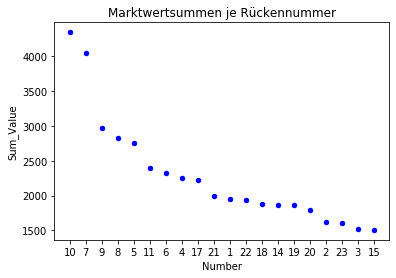

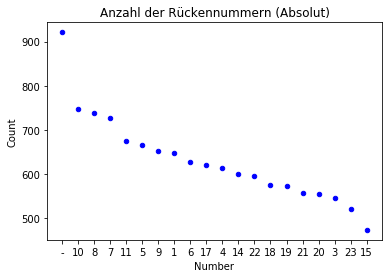

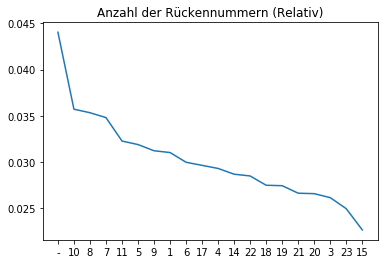

In [46]:
number_value = number_agg.sort_values(by=['Sum_Value'], ascending=False)[:20]
number_value.plot.scatter(x='Number',y='Sum_Value',c='Blue')
plt.title("Marktwertsummen je Rückennummer")
plt.show()

number_count = number_agg.sort_values(by=['Count'], ascending=False)[:20]
number_count.plot.scatter(x='Number',y='Count',c='Blue')
plt.title("Anzahl der Rückennummern (Absolut)")
plt.show()

x = number_count['Number'][:20]
y = df.Number.value_counts(normalize=True,dropna=False)[:20]
plt.title("Anzahl der Rückennummern (Relativ)")
plt.plot(x, y)
plt.show()

In der Fußball Welt sind die Rückennummer auf dem Trikot des Spielers nicht nur eine Nummer, sondern sind eine Art Statussymbol, welche Rolle man in einem Verein spielt. Dabei stehen die Nummern für die Stammposition, die ein Spieler spielt. So steht die Rückennummern 1 z. B. für den Stammtorhüter einer Mannschaft oder die Nummer 9 für den Stamm Stürmer einer Mannschaft.
Mithilfe denn folgenden Grafiken soll demnach geprüft werden, welche Marktwertsummen die Spieler mit der jeweiligen Rückennummer haben und wie oft die Rückennummer vergeben ist.
Hier kann man dann sofort sehen, dass vor allem die Rückennummer 10 und 7 von hoher Bedeutung in der Fußballwelt sind.